In [19]:
# set up 
lunarc = 0
seed_data = 7
nbr_rounds = 5 

import os

print(os.getcwd())

# set the wd to the base folder for the project
os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np
import random

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev


In [20]:
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))

# this func. is used to read both the posteiro sames and the data samples 
def read_posterior_samples(p):
    return np.loadtxt(p, delimiter=",")

In [21]:
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1
seed_max = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [22]:
nbr_data_hp_tuning = 10
nbr_round = 5

# Load results 

In [23]:
snl_res = np.zeros((10, nbr_data_hp_tuning-1))

idx = 0 
for i in range(nbr_data_hp_tuning):
    if i + 1 != 9:
        id_job =str(11) + '_' + str(7) + "_" + str(i+1)
        p = 'lotka_volterra/hp_tuning/snl_' + id_job + '.txt'
        snl_res[:,idx] = read_res_file(p)
        idx = idx + 1

In [24]:
snpec_res = np.zeros((9, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job =str(11) + '_' + str(7) + "_" + str(i+1)    
    p = 'lotka_volterra/hp_tuning/snpec_' + id_job + '.txt'
    snpec_res[:,i] = read_res_file(p)

In [25]:
snpla_res = np.zeros((12, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job =str(11) + '_' + str(7) + "_" + str(i+1)    
    p = 'lotka_volterra/hp_tuning/snpla_' + id_job + '.txt'
    snpla_res[:,i] = read_res_file(p)

In [26]:
snreb_res = np.zeros((9, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job =str(11) + '_' + str(7) + "_" + str(i+1)    
    p = 'lotka_volterra/hp_tuning/snre_b_' + id_job + '.txt'
    snreb_res[:,i] = read_res_file(p)

In [27]:
print("Nbr NaN SNL: " + str(np.isnan(snl_res[-1,:]).sum()))
print("Nbr NaN SNPE-C: " + str(np.isnan(snpec_res[-1,:]).sum()))
print("Nbr NaN SNPLA: " + str(np.isnan(snpla_res[-1,:]).sum()))
print("Nbr NaN SNRE-B: " + str(np.isnan(snreb_res[-1,:]).sum()))

snl_res = snl_res[:, ~np.isnan(snl_res).any(axis=0)]
snpec_res = snpec_res[:, ~np.isnan(snpec_res).any(axis=0)]
snpla_res = snpla_res[:, ~np.isnan(snpla_res).any(axis=0)]
snreb_res = snreb_res[:, ~np.isnan(snreb_res).any(axis=0)]

Nbr NaN SNL: 0
Nbr NaN SNPE-C: 0
Nbr NaN SNPLA: 0
Nbr NaN SNRE-B: 0


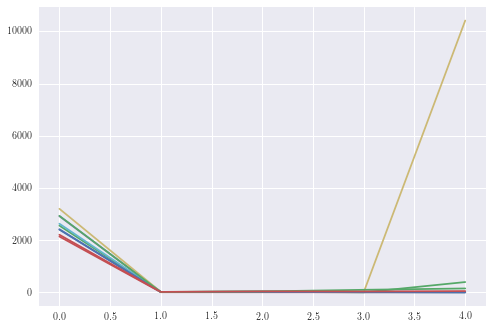

In [10]:
plt.figure()
plt.plot(snl_res[-1-nbr_round:-1, :]);

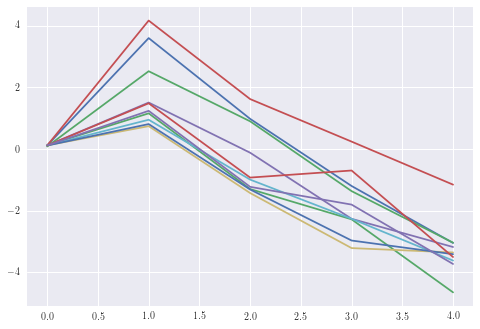

In [11]:
plt.figure()
plt.plot(snpec_res[-1-nbr_round:-1, :]);


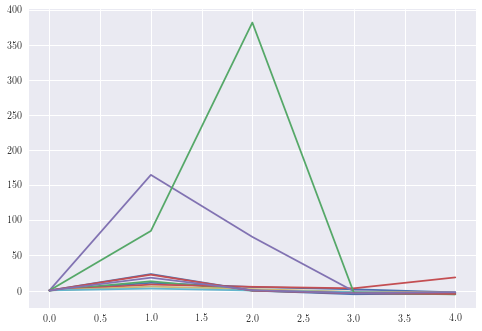

In [12]:
plt.figure()
plt.plot(snpla_res[-1-nbr_round:-1, :]);


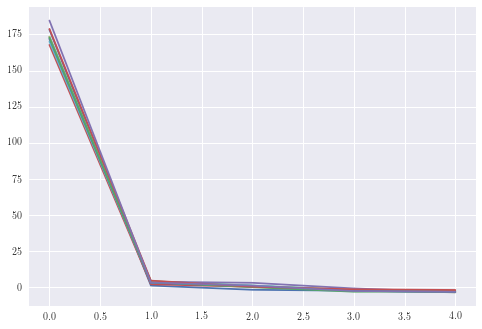

In [13]:
plt.figure()
plt.plot(snreb_res[-1-nbr_round:-1, :]);


In [28]:
print("Optimla hp for SNL: " + str(snl_res[1,np.argmin(snl_res[-1, :])]))
print("Optimla hp for SNPE-C: " + str(snpec_res[1,np.argmin(snpec_res[-1, :])]))
print("Optimla hp for SNPLA: " + str(snpla_res[1:5,np.argmin(snpla_res[-1, :])]))
print("Optimla hp for SNRE-B: " + str(snreb_res[1,np.argmin(snreb_res[-1, :])]))

Optimla hp for SNL: 0.005765
Optimla hp for SNPE-C: 0.006185
Optimla hp for SNPLA: [0.004635 0.00488  0.862187 0.834507]
Optimla hp for SNRE-B: 0.006185


In [29]:
print("SNL:")
print("Min: " + str(np.min(snl_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snl_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snl_res[-1, :])))
print("---")
print("SNPE-C:")
print("Min: " + str(np.min(snpec_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snpec_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snpec_res[-1, :])))
print("---")
print("SNPLA:")
print("Min: " + str(np.min(snpla_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snpla_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snpla_res[-1, :])))
print("---")
print("SNRE-B:")
print("Min: " + str(np.min(snreb_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snreb_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snreb_res[-1, :])))

SNL:
Min: -3.519
Q1, Q2, Q3: [-2.7494 -1.0239  3.7207]
Max: 21678.7363
---
SNPE-C:
Min: -5.3461
Q1, Q2, Q3: [-4.433475 -3.75815  -3.4731  ]
Max: -1.8893
---
SNPLA:
Min: -6.0527
Q1, Q2, Q3: [-5.5523  -4.87755 -3.8437 ]
Max: 7.1109
---
SNRE-B:
Min: -4.1981
Q1, Q2, Q3: [-4.145525 -3.5436   -2.97035 ]
Max: -1.4515


In [16]:
print(np.quantile(snl_res[-1, :], [0.25, 0.75]).round(3))
print(np.quantile(snpec_res[-1, :], [0.25, 0.75]).round(3))
print(np.quantile(snpla_res[-1, :], [0.25, 0.75]).round(3))
print(np.quantile(snreb_res[-1, :], [0.25, 0.75]).round(3))

[-2.749  3.721]
[-4.433 -3.473]
[-5.552 -3.844]
[-4.146 -2.97 ]


In [17]:
print(np.quantile(snl_res[-1, :], [0.5]).round(3))
print(np.quantile(snpec_res[-1, :], [0.5]).round(3))
print(np.quantile(snpla_res[-1, :], [0.5]).round(3))
print(np.quantile(snreb_res[-1, :], [0.5]).round(3))
print("---")
print(np.diff(np.quantile(snl_res[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snpec_res[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snpla_res[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snreb_res[-1, :], [0.25, 0.75])).round(3))


[-1.024]
[-3.758]
[-4.878]
[-3.544]
---
[6.47]
[0.96]
[1.709]
[1.175]


In [30]:
print((0.75*np.diff(np.quantile(snl_res[-1, :], [0.25, 0.75]))/np.quantile(snl_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snpec_res[-1, :], [0.25, 0.75]))/np.quantile(snpec_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snpla_res[-1, :], [0.25, 0.75]))/np.quantile(snpla_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snreb_res[-1, :], [0.25, 0.75]))/np.quantile(snreb_res[-1, :], [0.5])).round(3))


[-4.739]
[-0.192]
[-0.263]
[-0.249]
